In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data=pd.read_csv("database.csv.zip",low_memory=False )

# Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Record ID              638454 non-null  int64 
 1   Agency Code            638454 non-null  object
 2   Agency Name            638454 non-null  object
 3   Agency Type            638454 non-null  object
 4   City                   638454 non-null  object
 5   State                  638454 non-null  object
 6   Year                   638454 non-null  int64 
 7   Month                  638454 non-null  object
 8   Incident               638454 non-null  int64 
 9   Crime Type             638454 non-null  object
 10  Crime Solved           638454 non-null  object
 11  Victim Sex             638454 non-null  object
 12  Victim Age             638454 non-null  int64 
 13  Victim Race            638454 non-null  object
 14  Victim Ethnicity       638454 non-null  object
 15  

In [4]:
data.describe()

,Record ID,Year,Incident,Victim Age,Victim Count,Perpetrator Count
count,638454.00000,638454.000000,638454.000000,638454.000000,638454.000000,638454.000000
mean,319227.50000,1995.801102,22.967924,35.033512,0.123334,0.185224
std,184305.93872,9.927693,92.149821,41.628306,0.537733,0.585496
min,1.00000,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,159614.25000,1987.000000,1.000000,22.000000,0.000000,0.000000
50%,319227.50000,1995.000000,2.000000,30.000000,0.000000,0.000000
75%,478840.75000,2004.000000,10.000000,42.000000,0.000000,0.000000
max,638454.00000,2014.000000,999.000000,998.000000,10.000000,10.000000


In [5]:
data.isna().sum()

Record ID                0
Agency Code              0
Agency Name              0
Agency Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          0
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source            0
dtype: int64

In [6]:
data["Incident"].unique()

array([  1,   2,   3,   4,  41,   5,   6,   7,   8,   9,  10,  11,  33,
        12,  17,  13,  14,  15,  16,  18,  21,  19,  20,  22,  23,  60,
        28,  59,  29,  24,  66,  54,  49,  77,  40,  82,  37,  86,  31,
        53,  90,  25,  26,  27,  30,  32,  34,  35,  36,  38,  39,  42,
        43,  44,  45,  46,  47,  48,  50,  51,  52,  55,  56,  57,  58,
        61,  62,  63,  64,  65,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  78,  79,  80,  81,  83,  84,  85,  87,  88,  89,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 137, 126, 134, 151, 125, 205, 124,
       127, 128, 129, 130, 131, 132, 133, 135, 136, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

i was triggered by the column Incident but i couldn't understand it ..the minimum is 0 and the maximum is 999 incidents,but it can't be the number of accidents generated by the Perpetrator since the age and sex features refer to one person

i'll skip it for now and try to figure it out later 

i think it is the number of case for a given agency in a given month and year. 

## Crime's occurence and cordinates

In [7]:
data["City"].value_counts().head(20)

Los Angeles             44511
New York                38431
Cook                    22383
Wayne                   19904
Harris                  16331
Philadelphia            12851
Dallas                  11377
Jefferson                9573
Baltimore city           9336
Dade                     9077
Maricopa                 8582
Orleans                  7903
District of Columbia     7115
Orange                   6771
Fulton                   6503
St. Louis city           5955
Shelby                   5900
San Bernardino           5717
Jackson                  5564
Alameda                  5551
Name: City, dtype: int64

Text(0, 0.5, 'Frequency')

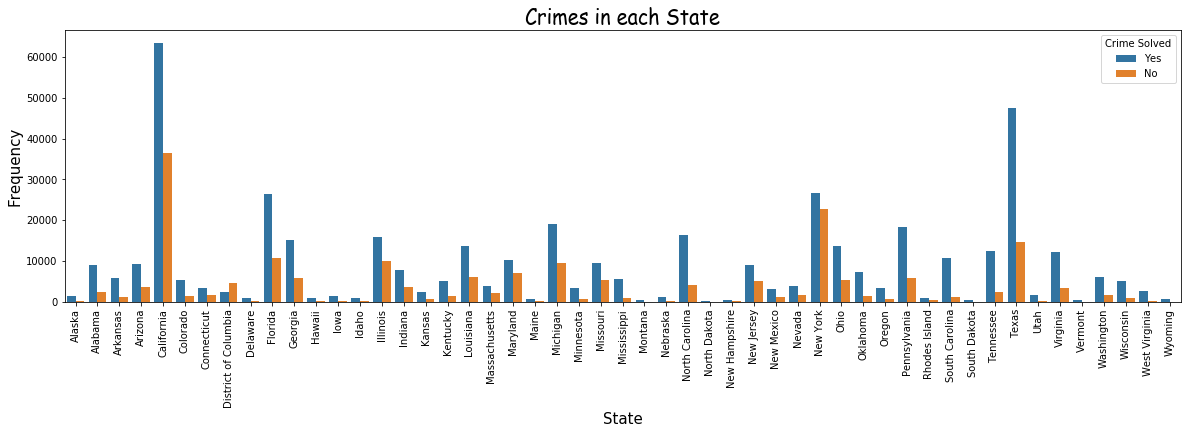

In [8]:
plt.figure(figsize=(20,5))
sns.countplot("State",data=data,hue="Crime Solved")
plt.xticks(rotation=90)
plt.title("Crimes in each State", fontdict={'fontname': 'Comic Sans MS', 'fontsize':20})
plt.xlabel("State",fontsize=15)
plt.ylabel("Frequency",fontsize=15)

crime rate is the highest in california ,Texas ,New York and Florida

Text(0, 0.5, 'Frequency')

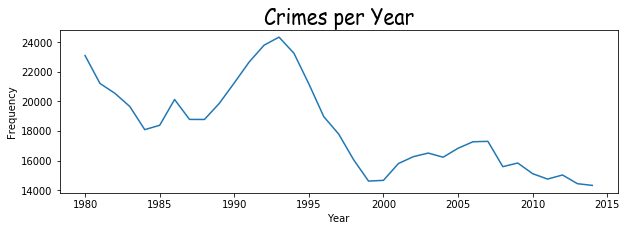

In [9]:
plt.figure(figsize=(10,3))
plt.plot(data["Year"].value_counts().sort_index())
plt.title("Crimes per Year" ,fontdict={'fontname': 'Comic Sans MS', 'fontsize':20})
plt.xlabel("Year" ,fontsize=10)
plt.ylabel('Frequency',fontsize=10)

In [10]:
data["Year"].value_counts().sort_index().max()

24335

In [11]:
data["Year"].sort_index().value_counts()

1993    24335
1992    23793
1994    23246
1980    23092
1991    22657
1990    21246
1981    21208
1995    21179
1982    20544
1986    20125
1989    19868
1983    19653
1996    18969
1987    18783
1988    18779
1985    18386
1984    18093
1997    17794
2007    17303
2006    17275
2005    16836
2003    16512
2002    16268
2004    16233
1998    16061
2009    15840
2001    15803
2008    15595
2010    15121
2012    15033
2011    14756
2000    14671
1999    14621
2013    14445
2014    14331
Name: Year, dtype: int64

we conclude that the highest crime rate happened in 1993 marking 24335 crimes and the lowest was in 2014 with about 10K crimes of difference 

A sharp increase in the number of murders was observed from 1989 to 1993. The maximum was reached in 1993. There has also been a sharp drop in the number of murders since 1999 until 1999. Within 6 years, the number of registered morderderst fell from about 24k to below 15k.

Text(0, 0.5, 'Frequency')

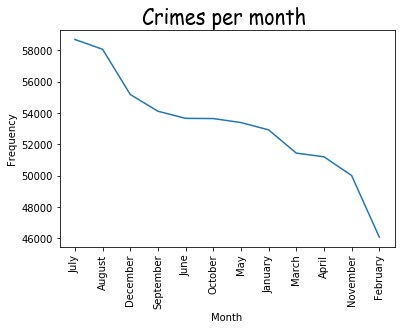

In [12]:
plt.plot(data["Month"].value_counts())
plt.xticks(rotation=90)
plt.title("Crimes per month ", fontdict={'fontname': 'Comic Sans MS', 'fontsize':20})
plt.xlabel("Month",fontsize=10)
plt.ylabel("Frequency",fontsize=10)

In [13]:
data["Month"].sort_index().value_counts()

July         58696
August       58072
December     55187
September    54117
June         53662
October      53650
May          53394
January      52928
March        51444
April        51209
November     50016
February     46079
Name: Month, dtype: int64

crimes commited per month iterate between around 58700 and 46000 but there is actually no specificpattern so we'll see it in relation with the year 

Text(0.5, 1, 'Crime Year an Month')

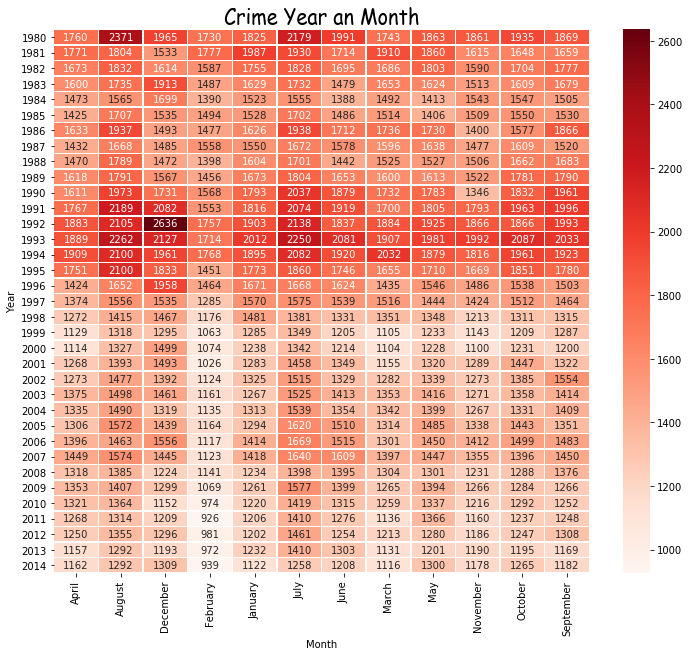

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(pd.crosstab(data["Year"],data["Month"]),annot=True,fmt="d", linewidths=.5,cmap='Reds')
plt.title("Crime Year an Month", fontdict={'fontname': 'Comic Sans MS', 'fontsize':20})

## Victim's and perpetraotor's info

#### Victim

Text(0.5, 1.0, 'victim age boxplot')

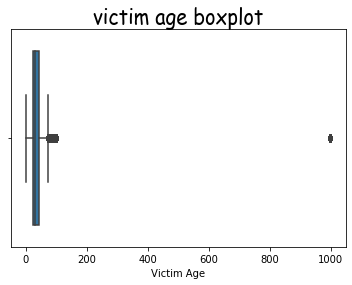

In [15]:
sns.boxplot(data["Victim Age"])
plt.title("victim age boxplot",fontdict={'fontname': 'Comic Sans MS', 'fontsize':20})

there are definetly many outliers here 

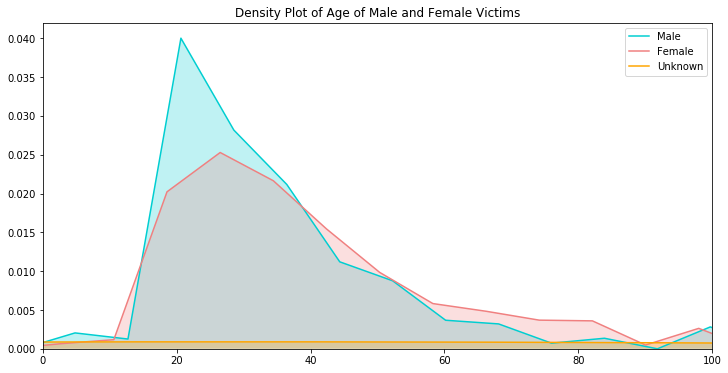

In [16]:
plt.figure(figsize=(12,6))
sns.kdeplot(data["Victim Age"][data["Victim Sex"] == "Male"], color="darkturquoise", shade=True)
sns.kdeplot(data["Victim Age"][data["Victim Sex"] == "Female"], color="lightcoral", shade=True)
sns.kdeplot(data["Victim Age"][data["Victim Sex"] == "Unknown"], color="orange", shade=True)
plt.legend(['Male', 'Female','Unknown'])
plt.title('Density Plot of Age of Male and Female Victims')
plt.xlim(0,100)
plt.show()

## since there are many outliers and wrong values like age 998 and -10 , i limitek the age between 0 and 100

In [17]:
data["Victim Race"].unique()

array(['Native American/Alaska Native', 'White', 'Black', 'Unknown',
       'Asian/Pacific Islander'], dtype=object)

Text(0.5, 1.0, 'Victim Ethnicity')

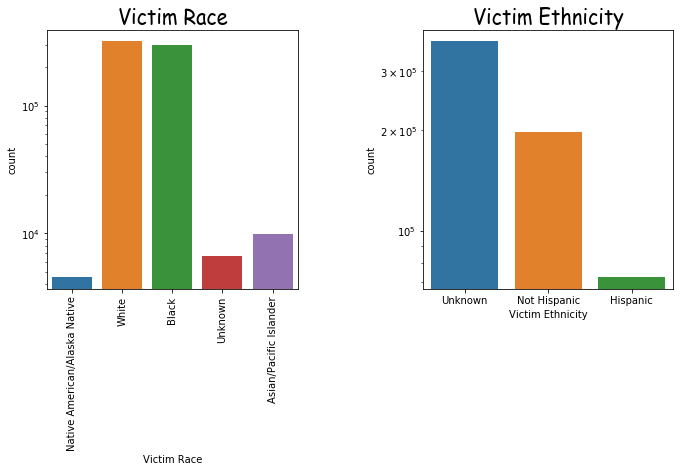

In [18]:
plt.subplots_adjust(bottom=0, left=.05, right=1.5, top=0.9, hspace=.6,wspace=.5)

plt.subplot(121)
sns.countplot(data["Victim Race"])
plt.yscale('log')
plt.xticks(rotation=90)
plt.title("Victim Race",fontdict={'fontname': 'Comic Sans MS', 'fontsize':20})

plt.subplot(122)
sns.countplot(data["Victim Ethnicity"])
plt.yscale('log')
plt.title("Victim Ethnicity",fontdict={'fontname': 'Comic Sans MS', 'fontsize':20})

most of the victims are white or black and their Ethnicity is unknown 

#### Perpetrator

Text(0.5, 1.3, 'Perpetrator Ethnicity ')

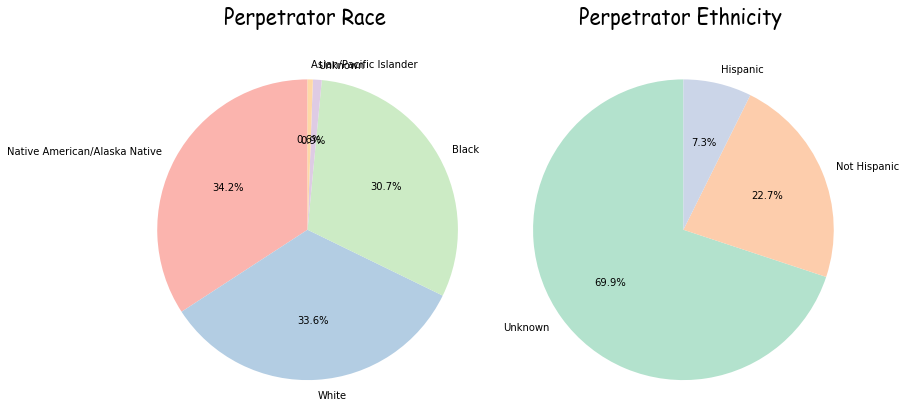

In [19]:
plt.subplots_adjust(bottom=0, left=.05, right=1.5, top=0.9, hspace=.6,wspace=.5)
plt.subplot(121)

plt.pie(data["Perpetrator Race"].value_counts(),
         labels=data["Victim Race"].unique(),
         startangle=90,
         autopct='%.1f%%',
        colors=sns.color_palette('Pastel1',15),
        radius=1.5)
plt.title("Perpetrator Race ",fontdict={'fontname': 'Comic Sans MS', 'fontsize':20},y=1.3)


plt.subplot(122)
plt.pie(data["Perpetrator Ethnicity"].value_counts(),
       labels=data["Victim Ethnicity"].unique(),
         startangle=90,
         autopct='%.1f%%',
        colors=sns.color_palette('Pastel2',20),
        radius=1.5)
plt.title("Perpetrator Ethnicity ",fontdict={'fontname': 'Comic Sans MS', 'fontsize':20},y=1.3)

## y=1.3 adds space between the title and the plot to prevent them from being immersed 

most Perpetrators ethnicity is unknown and most of them are white, native American/Alaska Native or Black 

In [20]:
data["Perpetrator Age"].unique()

array(['15', '42', '0', '36', '27', '35', '40', '49', '39', '29', '19',
       '23', '33', '26', '41', '28', '61', '25', '7', '17', '34', '21',
       '43', '38', '66', '32', '37', '22', '30', '24', '65', '51', '60',
       '45', '64', '18', '20', '44', '73', '62', '69', '52', '16', '90',
       '56', '47', '57', '31', '46', '14', '55', '50', '54', '68', '77',
       '53', '67', '48', '76', '58', '71', '63', '89', '13', '75', '72',
       '93', '59', '10', '11', '79', '74', '99', '70', '78', '80', '9',
       '12', '81', '6', '87', '82', '83', '8', '84', '85', '86', '5', '3',
       '1', '88', '95', '4', '91', '92', '96', '94', '2', '98', '97', ' '],
      dtype=object)

there seems to be an error in prepetrator age since its type is object and we can see from the list above that the last value is a space , so we'll get rid of it to be able to vizualise some data 

In [21]:
data= data[data["Perpetrator Age"].str.contains(' ') == False]

In [22]:
data["Perpetrator Age"].unique()

array(['15', '42', '0', '36', '27', '35', '40', '49', '39', '29', '19',
       '23', '33', '26', '41', '28', '61', '25', '7', '17', '34', '21',
       '43', '38', '66', '32', '37', '22', '30', '24', '65', '51', '60',
       '45', '64', '18', '20', '44', '73', '62', '69', '52', '16', '90',
       '56', '47', '57', '31', '46', '14', '55', '50', '54', '68', '77',
       '53', '67', '48', '76', '58', '71', '63', '89', '13', '75', '72',
       '93', '59', '10', '11', '79', '74', '99', '70', '78', '80', '9',
       '12', '81', '6', '87', '82', '83', '8', '84', '85', '86', '5', '3',
       '1', '88', '95', '4', '91', '92', '96', '94', '2', '98', '97'],
      dtype=object)

In [23]:
data["Perpetrator Age"] = data["Perpetrator Age"].astype(int)

In [24]:
data.describe()

,Record ID,Year,Incident,Victim Age,Perpetrator Age,Victim Count,Perpetrator Count
count,638453.000000,638453.000000,638453.000000,638453.000000,638453.000000,638453.000000,638453.000000
mean,319227.005932,1995.801074,22.967797,35.033495,20.322697,0.123334,0.185224
std,184305.660258,9.927675,92.149837,41.628336,17.886842,0.537734,0.585496
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,159614.000000,1987.000000,1.000000,22.000000,0.000000,0.000000,0.000000
50%,319227.000000,1995.000000,2.000000,30.000000,21.000000,0.000000,0.000000
75%,478840.000000,2004.000000,10.000000,42.000000,31.000000,0.000000,0.000000
max,638454.000000,2014.000000,999.000000,998.000000,99.000000,10.000000,10.000000


Text(0.5, 1.0, 'Perpetrator Sex and Age')

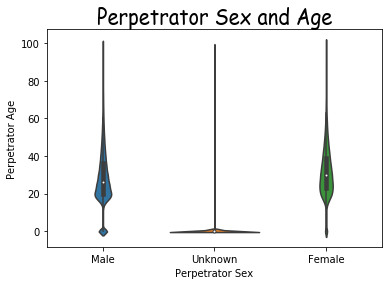

In [25]:
plt.subplot(111)
sns.violinplot(x=data["Perpetrator Sex"],y=data["Perpetrator Age"])
plt.title("Perpetrator Sex and Age",fontdict={'fontname': 'Comic Sans MS', 'fontsize':20})

most murderersare males with age between 20 and 40 and there are not much females

In [26]:
data["Perpetrator Sex"].value_counts()

Male       399541
Unknown    190364
Female      48548
Name: Perpetrator Sex, dtype: int64

Text(0.5, 1.0, "PErpetrator's SEx in each State")

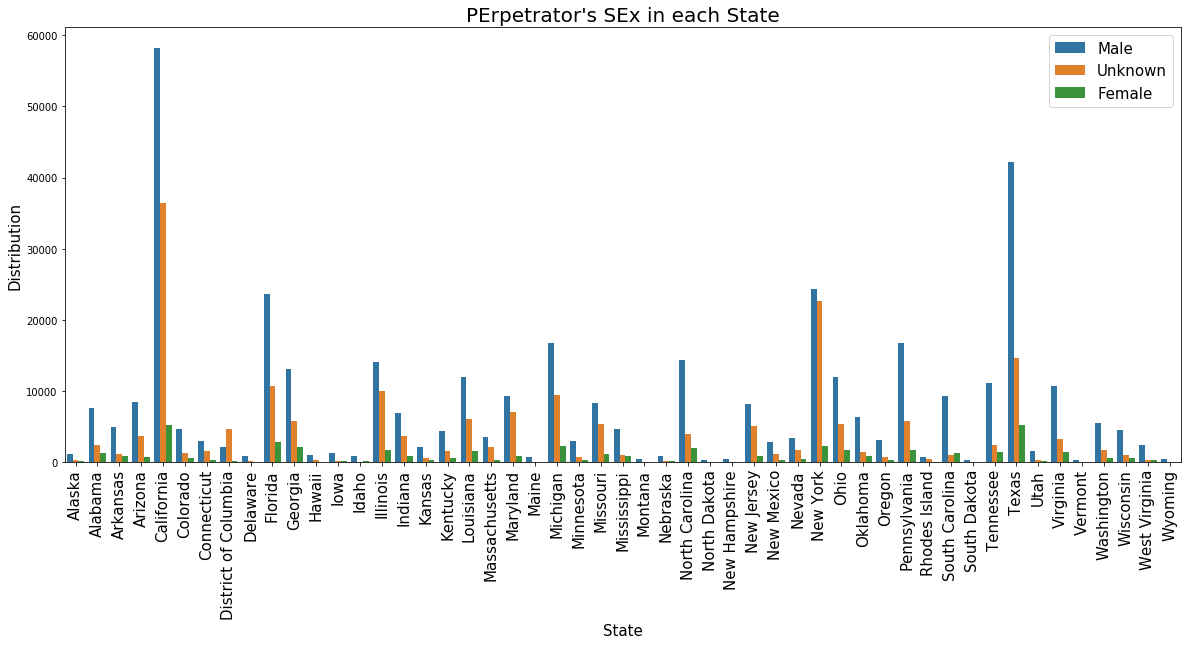

In [27]:


#Distribution of perpetrator sex per State
plt.figure(figsize=(20, 8))
ax=sns.countplot(x=data["State"], hue=data["Perpetrator Sex"])
ax.set_xticklabels(data["State"].unique(),rotation=90,fontsize=15)
ax.label_outer
ax.set_ylabel("Distribution",fontsize=15)
ax.set_xlabel("State",fontsize=15)
ax.legend(loc="upper right",fontsize=15)
ax.set_title("PErpetrator's SEx in each State",fontsize=20)



#### Relations between both and weapon

In [28]:
pd.crosstab(data["Victim Sex"],data["Perpetrator Sex"])

Perpetrator Sex,Female,Male,Unknown
Victim Sex,,,
Female,10869,99381,33095
Male,37629,299879,156616
Unknown,50,281,653


In [29]:
data.corr()

,Record ID,Year,Incident,Victim Age,Perpetrator Age,Victim Count,Perpetrator Count
Record ID,1.000000,0.997286,0.116941,0.004773,-0.031135,0.026973,0.056756
Year,0.997286,1.000000,0.124123,0.005513,-0.028447,0.026766,0.055960
Incident,0.116941,0.124123,1.000000,-0.006918,-0.026061,0.001782,0.001952
Victim Age,0.004773,0.005513,-0.006918,1.000000,0.041919,-0.008047,-0.017288
Perpetrator Age,-0.031135,-0.028447,-0.026061,0.041919,1.000000,0.026554,0.008878
Victim Count,0.026973,0.026766,0.001782,-0.008047,0.026554,1.000000,0.067284
Perpetrator Count,0.056756,0.055960,0.001952,-0.017288,0.008878,0.067284,1.000000


In [30]:
pd.crosstab(data["Relationship"],data["Weapon"])

Weapon,Blunt Object,Drowning,Drugs,Explosives,Fall,Fire,Firearm,Gun,Handgun,Knife,Poison,Rifle,Shotgun,Strangulation,Suffocation,Unknown
Relationship,,,,,,,,,,,,,,,,
Acquaintance,13681,135,373,55,53,965,4709,319,62674,24469,72,5636,8028,1196,447,3206
Boyfriend,222,0,33,5,2,42,135,13,2566,3595,5,195,263,20,11,195
Boyfriend/Girlfriend,231,4,4,0,0,8,19,0,344,573,5,24,35,74,15,47
Brother,400,9,10,10,2,63,191,21,2096,1446,0,485,642,14,17,108
Common-Law Husband,57,0,2,0,0,12,38,0,728,915,2,77,88,4,0,31
Common-Law Wife,370,3,2,1,2,20,70,4,1049,475,1,138,185,46,15,96
Daughter,2965,254,109,20,7,315,113,4,1119,428,44,137,184,130,545,1165
Employee,55,1,0,7,0,3,11,1,172,52,0,21,27,7,4,23
Employer,72,0,3,0,0,2,16,0,235,97,1,23,29,9,3,19


pd.crosstab counts how many occurrences there are of each combination.

Text(0.5, 1.0, 'Ralationship count')

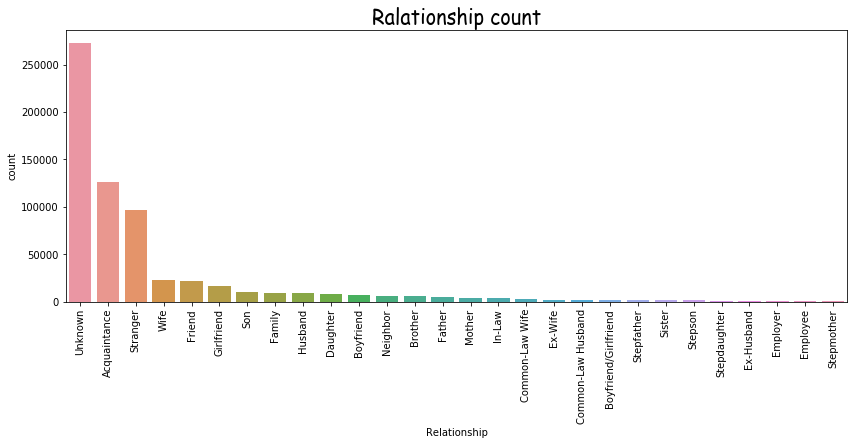

In [31]:
plt.figure(figsize=(14,5))
sns.countplot("Relationship",data=data,order=data['Relationship'].value_counts().index)
plt.xticks(rotation=90)

plt.title("Ralationship count",fontdict={'fontname': 'Comic Sans MS', 'fontsize':20})

most of the victims have an unknown relationship with the criminel , or are Acquaintances or strangers 

Text(0.5, 1.0, 'Victim Age and Relationship')

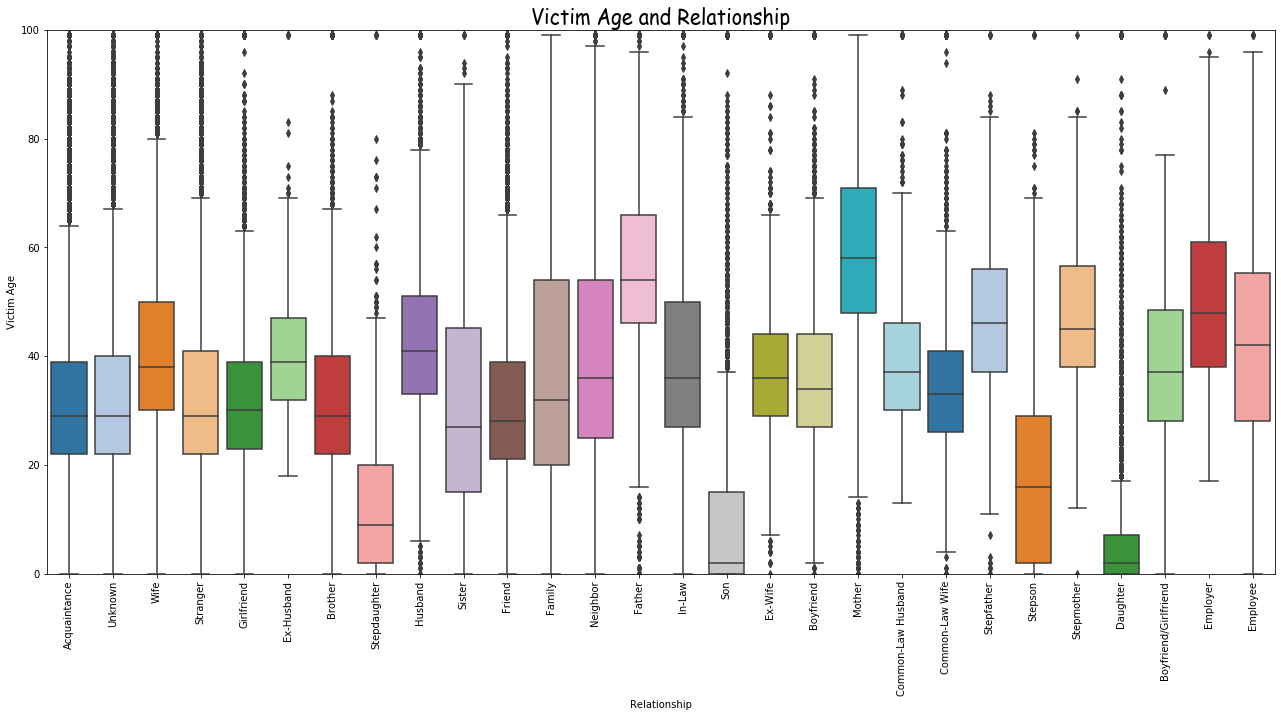

In [32]:
plt.figure(figsize=(22,10))
ax = sns.boxplot(x="Relationship", y="Victim Age", data=data,color='#666666', palette="tab20")
plt.xticks(rotation=90)
plt.ylim(0,100)
plt.title("Victim Age and Relationship",fontdict={'fontname': 'Comic Sans MS', 'fontsize':20})

since we limited the age between 1 and 100 (to avoid outliers) we see that son and daughter are below 0 and it probably means they were killed before being born and concerning the others , the average age is between 20 and 40except for the mother and the father which is between 40 and 60 

on a side note , there are many outliers in the victim age 

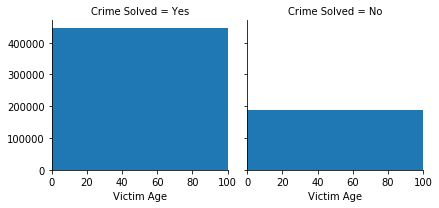

In [33]:
g=sns.FacetGrid(data=data,col="Crime Solved")
g.map(plt.hist,"Victim Age",bins=5)
plt.xlim(0,100)
g.add_legend()

more than 400K( four hundered thousand )crimes are solved and about 200K(two hundered thousand) are not 

Text(0.5, 1.0, 'Victim Age, Weapon and if crime is solved')

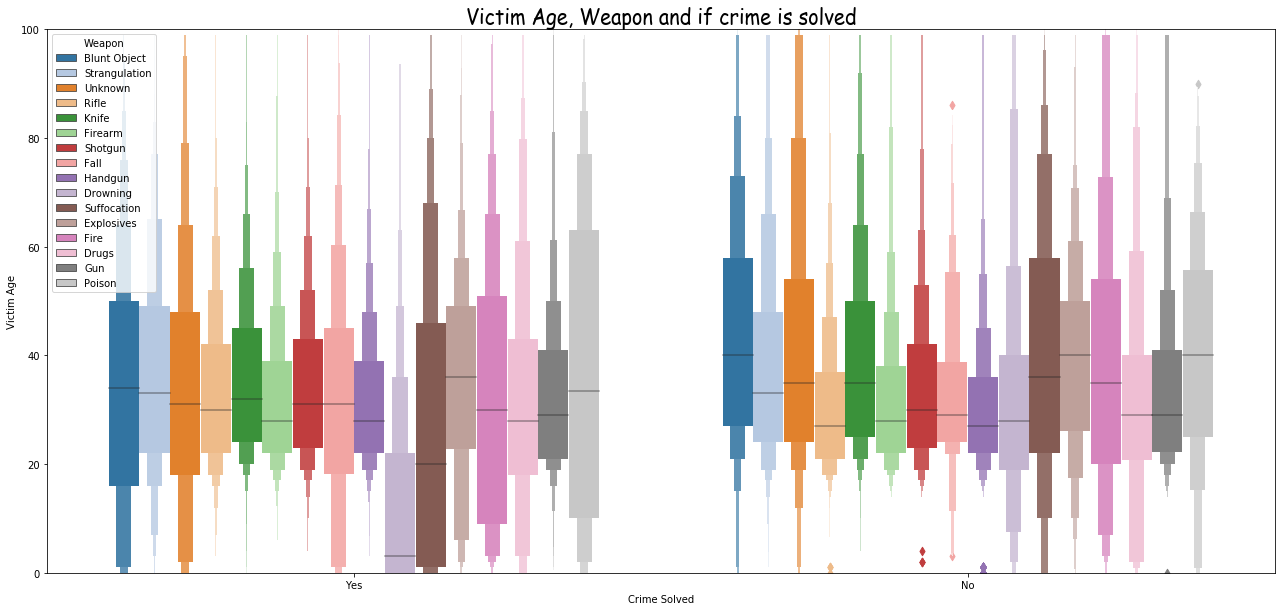

In [34]:
plt.figure(figsize=(22,10))
ax = sns.boxenplot(x="Crime Solved", y="Victim Age", data=data,hue="Weapon",color='#666666', palette="tab20")
plt.ylim(0,100)
plt.title("Victim Age, Weapon and if crime is solved",fontdict={'fontname': 'Comic Sans MS', 'fontsize':20})

In [49]:
#import plotly.express as px
#fig = px.scatter(data, x="State",y='Weapon', color="Crime Solved",
                 #hover_name="Weapon",template="plotly_dark",
                 #animation_frame='Year',animation_group='State')
#fig.show()

<img width=500  height=350  src="Screenshot_2020-06-06 crime EDA - Jupyter Notebook.png"  title="Title text" />

**Interpretation** 
1. Whenever the weapon is unknown it is harder to solve the crime that's why there are more unsolved crimes than solved ones when the weapon is unknown 

2. we can't give assumption about something else since it is not clear from this plot 

Text(0.5, 1.0, 'Most used Weapon')

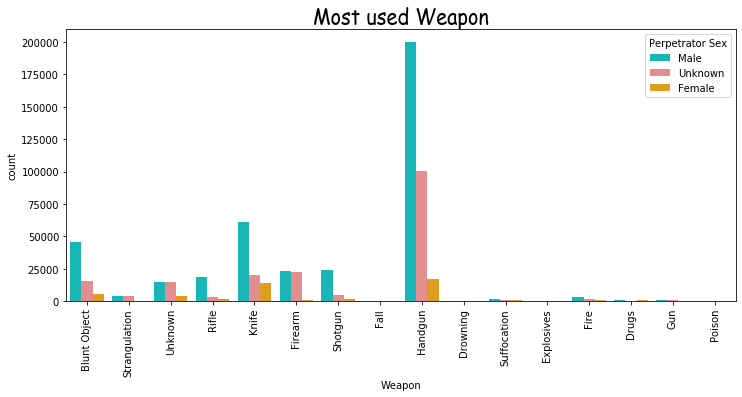

In [36]:
colors=["darkturquoise","lightcoral","orange"]
plt.figure(figsize=(12,5))
sns.countplot(data["Weapon"],hue=data["Perpetrator Sex"],palette=colors)
plt.xticks(rotation=90)
plt.title("Most used Weapon",fontdict={'fontname': 'Comic Sans MS', 'fontsize':20})

The graph shows that the gun and knife are most often chosen by both men and women. On the other hand, they both don't choose these weapons correspondingly as we can see the difference between the handgun and the knife 

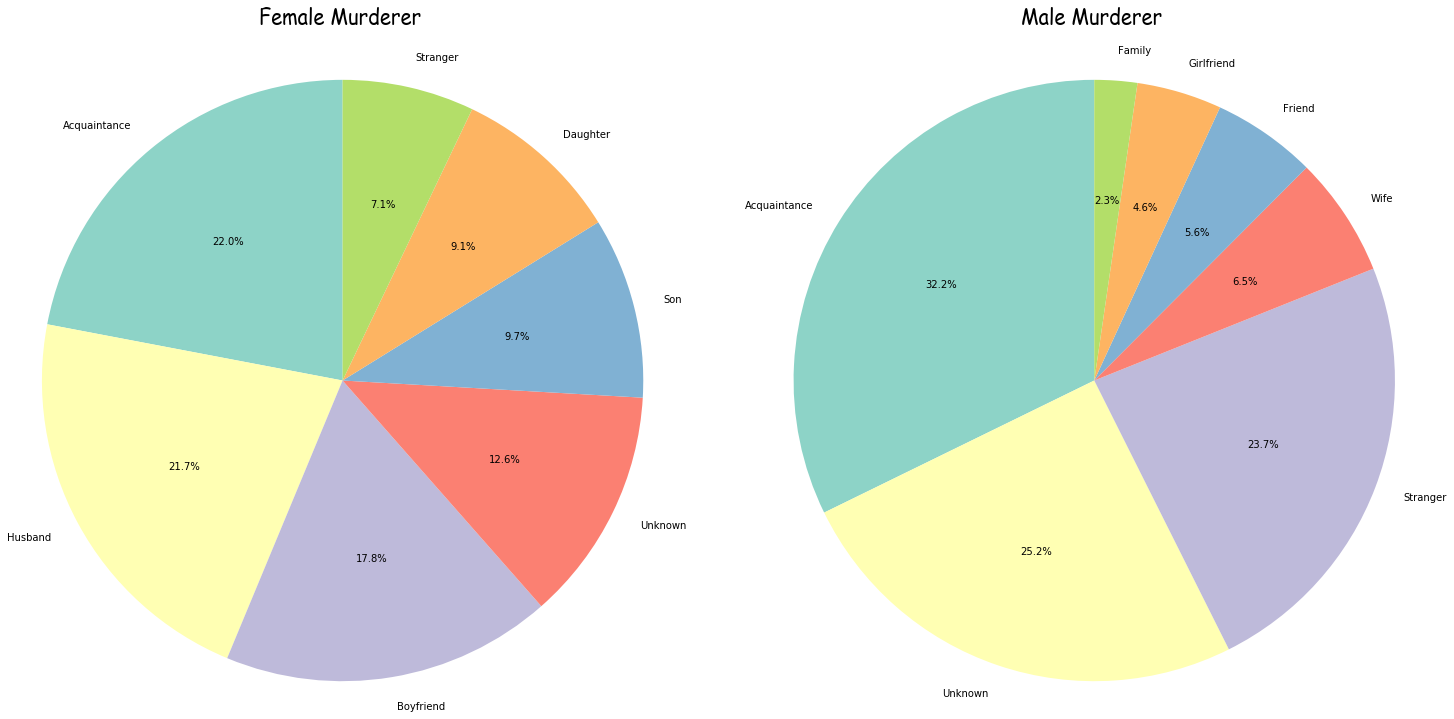

In [37]:

Femalemurderer=data[data["Perpetrator Sex"]=="Female"]
Malemurderer=data[data["Perpetrator Sex"]=="Male"]
fig=plt.figure(figsize=(12,8))
fig.subplots_adjust(bottom=0, left=.05, right=1.5, top=0.9, hspace=.6,wspace=.5)

plt.subplot(121)
plt.pie(x=Femalemurderer["Relationship"].value_counts()[0:7],
       labels=Femalemurderer["Relationship"].value_counts().index.unique()[0:7],
         startangle=90,
         autopct='%.1f%%',
        colors=sns.color_palette('Set3',15),
        radius=1.5)
plt.title("Female Murderer ",fontdict={'fontname': 'Comic Sans MS', 'fontsize':20},y=1.2)




plt.subplot(122)
plt.pie(x=Malemurderer["Relationship"].value_counts()[0:7],
       labels=Malemurderer["Relationship"].value_counts().index.unique()[0:7],
         startangle=90,
         autopct='%.1f%%',
        colors=sns.color_palette('Set3',15),
        radius=1.5)
plt.title("Male Murderer ",fontdict={'fontname': 'Comic Sans MS', 'fontsize':20},y=1.2)
plt.show()

For men we can see a smaller close connection between the victims and the murderer. There are three majority groups: Acquaintance, Stranger or relationship is not known at all. For women, the most attacked person was Acquaintance, Husband and Boyfriend. Men attacked partners in about 10% situations. In women, this ratio is 40-45%.

In [38]:
Malemurderer["Relationship"].value_counts().index.unique()[0:7]

Index(['Acquaintance', 'Unknown', 'Stranger', 'Wife', 'Friend', 'Girlfriend',
       'Family'],
      dtype='object')

**law enforcement Agencies**

In [39]:
data["Agency Type"].value_counts()

Municipal Police    493025
Sheriff             105322
County Police        22693
State Police         14235
Special Police        2889
Regional Police        235
Tribal Police           54
Name: Agency Type, dtype: int64

Text(0.5, 1.0, 'Agency reports count ')

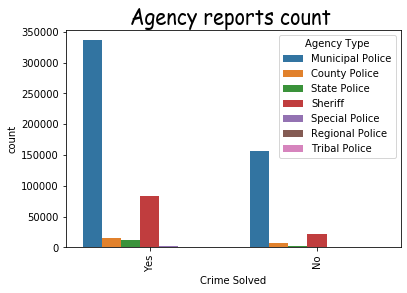

In [40]:
sns.countplot(x=data["Crime Solved"],hue=data["Agency Type"])
plt.xticks(rotation=90)

plt.title("Agency reports count ",fontdict={'fontname': 'Comic Sans MS', 'fontsize':20})

Text(0.5, 1.0, 'Agency Effectiveness ')

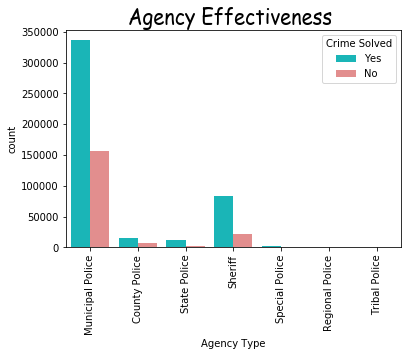

In [41]:
sns.countplot(x=data["Agency Type"],hue=data["Crime Solved"],palette=colors)
plt.xticks(rotation=90)
plt.title("Agency Effectiveness ",fontdict={'fontname': 'Comic Sans MS', 'fontsize':20})

Municipal Police has the highest murder report but it wasn't able to solve even half of them.

While smaller agencies like county police solved most of the crimes that it has reported 

Unfortunately, I could not find definitions for victim and perpetrator counts. My thoughts are that perpetrator count indicates the number of additional offenders (if applicable) that directly provided assistance to the killer. For victim count, my best guess would be the number of bystanders that sustained unintentional causalities or injuries

Text(0.5, 1.0, 'Perpetrators Engaged')

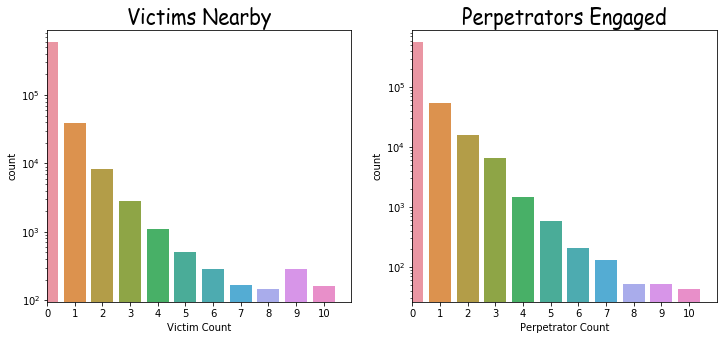

In [42]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.countplot(data["Victim Count"])
plt.yscale('log')
plt.xlim(0,11)
plt.title("Victims Nearby",fontdict={'fontname': 'Comic Sans MS', 'fontsize':20})


plt.subplot(122)
sns.countplot(data["Perpetrator Count"])
plt.yscale('log')
plt.xlim(0,11)
plt.title("Perpetrators Engaged",fontdict={'fontname': 'Comic Sans MS', 'fontsize':20})


usually there is one victim and no other causalties and only one perpetrator without any cooperation from others 

In [43]:
data["Record Source"].value_counts()

FBI     616646
FOIA     21807
Name: Record Source, dtype: int64

most cases were reported by the FBI 

In [44]:
data["Crime Type"].value_counts()

Murder or Manslaughter        629337
Manslaughter by Negligence      9116
Name: Crime Type, dtype: int64

Text(0.5, 1.0, 'Crime Type')

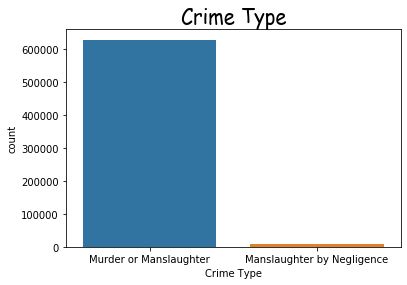

In [45]:
sns.countplot(data["Crime Type"])
plt.title("Crime Type",fontdict={'fontname': 'Comic Sans MS', 'fontsize':20})

only a few cases are among the type of "manslaughter by accident" which means they are not considered real crimes 

### Summary:

It has been shown that the greatest number of murders was observed in the states of California and Texas. Los Angeles is a city where was observed the most homicides compared to other cities in the United States. Since 1993, the number of incidents began to fall sharply and since 1999 no sudden changes can be seen. The most popular murder weapon is a gun and a knife, and the partners in the relationship are largely victims of murders made by women. Among the law enforcement agencies, the Municipal Police registered the most murders. In addition, agencies that registered fewer were more effective in solving murders.